In [1]:
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
pd.options.display.max_columns = 1000

In [2]:
df = pd.read_csv('./sovi_shi_combined_updated.csv')
df.head()

,Unnamed: 0,School_Year,School_ID,School_Name,Region_Name,Division_Name,District_Name,Total_Enrollment,Comments,Original_Water_Boolean,Water_Boolean_Reversed,Original_Internet_Boolean,Internet_Boolean_Reversed,Original_Electricity_Boolean,Electricity_Boolean_Reversed,Instructional_Rooms,Student_Classroom_Ratio,Total_Teaching,Student_Teacher_Ratio,Latitude,Longitude,CNTRY_NAME,ADMIN_NAME,CNTRY_CODE,GEOLEVEL2,PARENT,Unnamed: 0.1,sovi13,num_persons,num_female,sovi1,num_children,sovi2,num_elderly,sovi3,num_adults_no_sec_degree,sovi4,num_fem20_39_nodeg,sovi5,num_female_head,sovi6,overseas_hholds,num_hholds,sovi7,num_hhold_over30,sovi8,num_area10,sovi9,num_tenure,sovi10,num_disabled,sovi11,num_head_education,sovi12
0,0,2016,101746,"A. Diaz, Sr. ES",Region I,"Pangasinan II, Binalonan",Bautista,789,NaN,1,0,0,1,1,0,21,37.57143,22.0,35.86364,15.79912,120.49853,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178
1,1,2016,101747,Artacho ES,Region I,"Pangasinan II, Binalonan",Bautista,150,NaN,1,0,1,0,1,0,7,21.42857,7.0,21.42857,15.81157,120.56506,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178
2,2,2016,101749,Bautista CS,Region I,"Pangasinan II, Binalonan",Bautista,1293,NaN,1,0,1,0,1,0,34,38.02941,40.0,32.32500,15.81101,120.47835,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178
3,3,2016,101697,Bersamin ES,Region I,"Pangasinan II, Binalonan",Alcala,496,NaN,1,0,1,0,1,0,19,26.10526,16.0,31.00000,15.81621,120.55483,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178
4,4,2016,101699,Guinawedan ES,Region I,"Pangasinan II, Binalonan",Alcala,202,NaN,1,0,1,0,1,0,9,22.44444,8.0,25.25000,15.82806,120.56000,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178


In [3]:
df.columns

Index(['Unnamed: 0', 'School_Year', 'School_ID', 'School_Name', 'Region_Name',
       'Division_Name', 'District_Name', 'Total_Enrollment', 'Comments',
       'Original_Water_Boolean', 'Water_Boolean_Reversed',
       'Original_Internet_Boolean', 'Internet_Boolean_Reversed',
       'Original_Electricity_Boolean', 'Electricity_Boolean_Reversed',
       'Instructional_Rooms', 'Student_Classroom_Ratio', 'Total_Teaching',
       'Student_Teacher_Ratio', 'Latitude', 'Longitude', 'CNTRY_NAME',
       'ADMIN_NAME', 'CNTRY_CODE', 'GEOLEVEL2', 'PARENT', 'Unnamed: 0.1',
       'sovi13', 'num_persons', 'num_female', 'sovi1', 'num_children', 'sovi2',
       'num_elderly', 'sovi3', 'num_adults_no_sec_degree', 'sovi4',
       'num_fem20_39_nodeg', 'sovi5', 'num_female_head', 'sovi6',
       'overseas_hholds', 'num_hholds', 'sovi7', 'num_hhold_over30', 'sovi8',
       'num_area10', 'sovi9', 'num_tenure', 'sovi10', 'num_disabled', 'sovi11',
       'num_head_education', 'sovi12'],
      dtype='object')

In [4]:
maximum = df[['sovi1', 'sovi2','sovi3', 'sovi4', 'sovi5', 'sovi6', 'sovi7', 'sovi8', 'sovi9',\
           'sovi10', 'sovi11', 'sovi12']].apply(max, axis=0)
minimum = df[['sovi1', 'sovi2','sovi3', 'sovi4', 'sovi5', 'sovi6', 'sovi7', 'sovi8', 'sovi9',\
           'sovi10', 'sovi11', 'sovi12']].apply(min, axis=0)

In [5]:
sorted(maximum)

[0.13462669018224574,
 0.1441717791411043,
 0.2034090909090909,
 0.2494496786123096,
 0.2887323943661972,
 0.5215686274509804,
 0.538865836791148,
 0.5420340975896532,
 0.6732085216268561,
 0.7537840565085772,
 0.7576687116564417,
 0.9121951219512195]

In [6]:
sorted(minimum)

[0.0010615711252653928,
 0.0011750881316098707,
 0.01110706482155863,
 0.011326860841423949,
 0.014282526221825484,
 0.015488867376573087,
 0.01595159515951595,
 0.02083333333333337,
 0.10637092046120772,
 0.11277242777496198,
 0.2384980400247576,
 0.4597069597069597]

In [7]:
avg_hhold = df[['sovi13']].values

In [8]:
scaler = MinMaxScaler()
scaler.set_params(feature_range = (0.0010615711252653928,0.9121951219512195))

MinMaxScaler(copy=True,
       feature_range=(0.0010615711252653928, 0.9121951219512195))

In [9]:
matrix = scaler.fit_transform(avg_hhold)
matrix

array([[0.31929899],
       [0.31929899],
       [0.31929899],
       ...,
       [0.65800842],
       [0.41153223],
       [0.57443702]])

In [10]:
df['sovi13_scaled'] = matrix

In [11]:
df.columns

Index(['Unnamed: 0', 'School_Year', 'School_ID', 'School_Name', 'Region_Name',
       'Division_Name', 'District_Name', 'Total_Enrollment', 'Comments',
       'Original_Water_Boolean', 'Water_Boolean_Reversed',
       'Original_Internet_Boolean', 'Internet_Boolean_Reversed',
       'Original_Electricity_Boolean', 'Electricity_Boolean_Reversed',
       'Instructional_Rooms', 'Student_Classroom_Ratio', 'Total_Teaching',
       'Student_Teacher_Ratio', 'Latitude', 'Longitude', 'CNTRY_NAME',
       'ADMIN_NAME', 'CNTRY_CODE', 'GEOLEVEL2', 'PARENT', 'Unnamed: 0.1',
       'sovi13', 'num_persons', 'num_female', 'sovi1', 'num_children', 'sovi2',
       'num_elderly', 'sovi3', 'num_adults_no_sec_degree', 'sovi4',
       'num_fem20_39_nodeg', 'sovi5', 'num_female_head', 'sovi6',
       'overseas_hholds', 'num_hholds', 'sovi7', 'num_hhold_over30', 'sovi8',
       'num_area10', 'sovi9', 'num_tenure', 'sovi10', 'num_disabled', 'sovi11',
       'num_head_education', 'sovi12', 'sovi13_scaled'],
    

In [12]:
df.head()

,Unnamed: 0,School_Year,School_ID,School_Name,Region_Name,Division_Name,District_Name,Total_Enrollment,Comments,Original_Water_Boolean,Water_Boolean_Reversed,Original_Internet_Boolean,Internet_Boolean_Reversed,Original_Electricity_Boolean,Electricity_Boolean_Reversed,Instructional_Rooms,Student_Classroom_Ratio,Total_Teaching,Student_Teacher_Ratio,Latitude,Longitude,CNTRY_NAME,ADMIN_NAME,CNTRY_CODE,GEOLEVEL2,PARENT,Unnamed: 0.1,sovi13,num_persons,num_female,sovi1,num_children,sovi2,num_elderly,sovi3,num_adults_no_sec_degree,sovi4,num_fem20_39_nodeg,sovi5,num_female_head,sovi6,overseas_hholds,num_hholds,sovi7,num_hhold_over30,sovi8,num_area10,sovi9,num_tenure,sovi10,num_disabled,sovi11,num_head_education,sovi12,sovi13_scaled
0,0,2016,101746,"A. Diaz, Sr. ES",Region I,"Pangasinan II, Binalonan",Bautista,789,NaN,1,0,0,1,1,0,21,37.57143,22.0,35.86364,15.79912,120.49853,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299
1,1,2016,101747,Artacho ES,Region I,"Pangasinan II, Binalonan",Bautista,150,NaN,1,0,1,0,1,0,7,21.42857,7.0,21.42857,15.81157,120.56506,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299
2,2,2016,101749,Bautista CS,Region I,"Pangasinan II, Binalonan",Bautista,1293,NaN,1,0,1,0,1,0,34,38.02941,40.0,32.32500,15.81101,120.47835,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299
3,3,2016,101697,Bersamin ES,Region I,"Pangasinan II, Binalonan",Alcala,496,NaN,1,0,1,0,1,0,19,26.10526,16.0,31.00000,15.81621,120.55483,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299
4,4,2016,101699,Guinawedan ES,Region I,"Pangasinan II, Binalonan",Alcala,202,NaN,1,0,1,0,1,0,9,22.44444,8.0,25.25000,15.82806,120.56000,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299


In [13]:
df['sovi_score'] = df['sovi1'] + df['sovi2'] + df['sovi3'] + df['sovi4'] + df['sovi5'] + df['sovi6'] + \
df['sovi7'] + df['sovi8'] + df['sovi9'] + df['sovi10'] + df['sovi11'] + df['sovi12'] + df['sovi13']

In [14]:
df.head(20)

,Unnamed: 0,School_Year,School_ID,School_Name,Region_Name,Division_Name,District_Name,Total_Enrollment,Comments,Original_Water_Boolean,Water_Boolean_Reversed,Original_Internet_Boolean,Internet_Boolean_Reversed,Original_Electricity_Boolean,Electricity_Boolean_Reversed,Instructional_Rooms,Student_Classroom_Ratio,Total_Teaching,Student_Teacher_Ratio,Latitude,Longitude,CNTRY_NAME,ADMIN_NAME,CNTRY_CODE,GEOLEVEL2,PARENT,Unnamed: 0.1,sovi13,num_persons,num_female,sovi1,num_children,sovi2,num_elderly,sovi3,num_adults_no_sec_degree,sovi4,num_fem20_39_nodeg,sovi5,num_female_head,sovi6,overseas_hholds,num_hholds,sovi7,num_hhold_over30,sovi8,num_area10,sovi9,num_tenure,sovi10,num_disabled,sovi11,num_head_education,sovi12,sovi13_scaled,sovi_score
0,0,2016,101746,"A. Diaz, Sr. ES",Region I,"Pangasinan II, Binalonan",Bautista,789,NaN,1,0,0,1,1,0,21,37.57143,22.0,35.86364,15.79912,120.49853,Philippines,Bautista,608.0,608055039.0,55.0,976,5.753510,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.217760,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901
1,1,2016,101747,Artacho ES,Region I,"Pangasinan II, Binalonan",Bautista,150,NaN,1,0,1,0,1,0,7,21.42857,7.0,21.42857,15.81157,120.56506,Philippines,Bautista,608.0,608055039.0,55.0,976,5.753510,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.217760,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901
2,2,2016,101749,Bautista CS,Region I,"Pangasinan II, Binalonan",Bautista,1293,NaN,1,0,1,0,1,0,34,38.02941,40.0,32.32500,15.81101,120.47835,Philippines,Bautista,608.0,608055039.0,55.0,976,5.753510,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.217760,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901
3,3,2016,101697,Bersamin ES,Region I,"Pangasinan II, Binalonan",Alcala,496,NaN,1,0,1,0,1,0,19,26.10526,16.0,31.00000,15.81621,120.55483,Philippines,Bautista,608.0,608055039.0,55.0,976,5.753510,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.217760,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901
4,4,2016,101699,Guinawedan ES,Region I,"Pangasinan II, Binalonan",Alcala,202,NaN,1,0,1,0,1,0,9,22.44444,8.0,25.25000,15.82806,120.56000,Philippines,Bautista,608.0,608055039.0,55.0,976,5.753510,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.217760,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901
5,5,2016,101750,Ketegan ES,Region I,"Pangasinan II, Binalonan",Bautista,186,NaN,1,0,1,0,1,0,8,23.25000,7.0,26.57143,15.81667,120.48522,Philippines,Bautista,608.0,608055039.0,55.0,976,5.753510,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.217760,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901
6,6,2016,101700,Laoac ES,Region I,"Pangasinan II, Binalonan",Alcala,482,NaN,1,0,1,0,1,0,16,30.12500,15.0,32.13333,15.83056,120.50694,Philippines,Bautista,608.0,608055039.0,55.0,976,5.753510,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.217760,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901
7,7,2016,101752,Pogo ES,Region I,"Pangasinan II, Binalonan",Bautista,311,NaN,1,0,1,0,1,0,10,31.10000,8.0,38.87500,15.81806,120.49472,Philippines,Bautista,608.0,608055039.0,55.0,976,5.753510,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.217760,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901
8,8,2016,101753,Poponto ES,Region I,"Pangasinan II, Binalonan",Bautis

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
shi = df[['Water_Boolean_Reversed', 'Internet_Boolean_Reversed', 'Electricity_Boolean_Reversed',\
         'Student_Classroom_Ratio','Student_Teacher_Ratio']]


pca_frame = df[['Water_Boolean_Reversed',"Internet_Boolean_Reversed","Electricity_Boolean_Reversed"]]

shi["shi_pt1"] = pca.fit_transform(pca_frame.values)
shi = shi.drop(["Water_Boolean_Reversed","Internet_Boolean_Reversed","Electricity_Boolean_Reversed"], axis=1)
#print(shi)
shi_scaler = MinMaxScaler()
shi_scaler.set_params(feature_range = (0,1))

shi_values = shi.values

/Users/heatherbaier/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
shi

,Student_Classroom_Ratio,Student_Teacher_Ratio,shi_pt1
0,37.57143,35.86364,-0.278309
1,21.42857,21.42857,0.676986
2,38.02941,32.32500,0.676986
3,26.10526,31.00000,0.676986
4,22.44444,25.25000,0.676986
5,23.25000,26.57143,0.676986
6,30.12500,32.13333,0.676986
7,31.10000,38.87500,0.676986
8,32.88889,37.00000,0.676986
9,38.35294,36.22222,-0.278309


In [17]:
shi_matrix = shi_scaler.fit_transform(shi_values)
shi_matrix

array([[0.00462673, 0.02474955, 0.28274403],
       [0.00254844, 0.01474497, 1.        ],
       [0.00468569, 0.02229701, 1.        ],
       ...,
       [0.01173706, 0.01520702, 0.28274403],
       [0.00482904, 0.01571857, 0.28274403],
       [0.00757864, 0.01852938, 0.28274403]])

In [18]:
shi = pd.DataFrame(shi_matrix)
shi.columns = ['Student_Classroom_Ratio_Scaled',\
               'Student_Teacher_Ratio_Scaled','shi_pca']#Infrast
shi.head()

,Student_Classroom_Ratio_Scaled,Student_Teacher_Ratio_Scaled,shi_pca
0,0.004627,0.024750,0.282744
1,0.002548,0.014745,1.000000
2,0.004686,0.022297,1.000000
3,0.003151,0.021379,1.000000
4,0.002679,0.017394,1.000000


In [19]:
shi['shi_score']= shi.sum(axis=1)

In [20]:
shi.head()

,Student_Classroom_Ratio_Scaled,Student_Teacher_Ratio_Scaled,shi_pca,shi_score
0,0.004627,0.024750,0.282744,0.312120
1,0.002548,0.014745,1.000000,1.017293
2,0.004686,0.022297,1.000000,1.026983
3,0.003151,0.021379,1.000000,1.024529
4,0.002679,0.017394,1.000000,1.020073


In [21]:
complete = pd.merge(df,shi,right_index=True,left_index=True)

In [22]:
complete.head()

,Unnamed: 0,School_Year,School_ID,School_Name,Region_Name,Division_Name,District_Name,Total_Enrollment,Comments,Original_Water_Boolean,Water_Boolean_Reversed,Original_Internet_Boolean,Internet_Boolean_Reversed,Original_Electricity_Boolean,Electricity_Boolean_Reversed,Instructional_Rooms,Student_Classroom_Ratio,Total_Teaching,Student_Teacher_Ratio,Latitude,Longitude,CNTRY_NAME,ADMIN_NAME,CNTRY_CODE,GEOLEVEL2,PARENT,Unnamed: 0.1,sovi13,num_persons,num_female,sovi1,num_children,sovi2,num_elderly,sovi3,num_adults_no_sec_degree,sovi4,num_fem20_39_nodeg,sovi5,num_female_head,sovi6,overseas_hholds,num_hholds,sovi7,num_hhold_over30,sovi8,num_area10,sovi9,num_tenure,sovi10,num_disabled,sovi11,num_head_education,sovi12,sovi13_scaled,sovi_score,Student_Classroom_Ratio_Scaled,Student_Teacher_Ratio_Scaled,shi_pca,shi_score
0,0,2016,101746,"A. Diaz, Sr. ES",Region I,"Pangasinan II, Binalonan",Bautista,789,NaN,1,0,0,1,1,0,21,37.57143,22.0,35.86364,15.79912,120.49853,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901,0.004627,0.024750,0.282744,0.312120
1,1,2016,101747,Artacho ES,Region I,"Pangasinan II, Binalonan",Bautista,150,NaN,1,0,1,0,1,0,7,21.42857,7.0,21.42857,15.81157,120.56506,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901,0.002548,0.014745,1.000000,1.017293
2,2,2016,101749,Bautista CS,Region I,"Pangasinan II, Binalonan",Bautista,1293,NaN,1,0,1,0,1,0,34,38.02941,40.0,32.32500,15.81101,120.47835,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901,0.004686,0.022297,1.000000,1.026983
3,3,2016,101697,Bersamin ES,Region I,"Pangasinan II, Binalonan",Alcala,496,NaN,1,0,1,0,1,0,19,26.10526,16.0,31.00000,15.81621,120.55483,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901,0.003151,0.021379,1.000000,1.024529
4,4,2016,101699,Guinawedan ES,Region I,"Pangasinan II, Binalonan",Alcala,202,NaN,1,0,1,0,1,0,9,22.44444,8.0,25.25000,15.82806,120.56000,Philippines,Bautista,608.0,608055039.0,55.0,976,5.75351,3063,1457.0,0.475677,1077.0,0.351616,260.0,0.084884,667.0,0.21776,90.0,0.029383,321.0,0.104799,66.0,642,0.102804,151.0,0.235202,40.0,0.062305,574.0,0.105919,41.0,0.063863,246.0,0.383178,0.319299,7.970901,0.002679,0.017394,1.000000,1.020073


Text(0, 0.5, 'SHI')

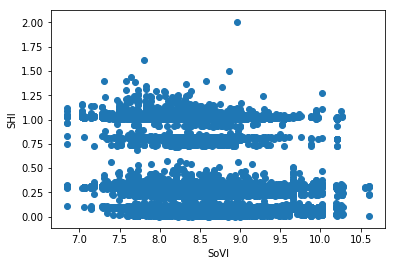

In [23]:
plt.scatter(complete['sovi_score'], complete['shi_score'])
plt.xlabel('SoVI')
plt.ylabel('SHI')

In [24]:
complete.to_csv('./pca_sovi_shi_updated.csv')